<a href="https://colab.research.google.com/github/yanqin-denver/Product-Client-Research-Project/blob/master/Product_and_research_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and Clean Data

In [0]:
# import file
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving Product & Customer Research.xlsx to Product & Customer Research.xlsx


In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Product & Customer Research.xlsx']), "Research Results")

In [0]:
# get dimension of dataset
df.shape

(16173, 18)

In [0]:
# return variable types
df.dtypes

Customer Number                                  float64
Purchase amount during research period           float64
Historical Sales Volume                          float64
Date of First Purchase                    datetime64[ns]
Number of Prior Year Transactions                float64
External Agent                                    object
Repurchase Method                                 object
Last Transaction Channel                          object
Miltefosine                                       object
Ambisome                                          object
Pentamidine                                       object
benznidazole                                      object
nifurtimox                                        object
dapsone                                           object
streptomycin                                      object
Malarone                                          object
Ribavirin                                         object
Ship to country                

remove blanks and NaNs

In [0]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()

In [0]:
df.shape[0]

15728

In [0]:
df.shape[0]/16173

0.9724850058739876

remove negative purchases and negative historical sales

In [0]:
df[["Purchase amount during research period", "Historical Sales Volume"]].describe()

,Purchase amount during research period,Historical Sales Volume
count,15728.000000,1.572800e+04
mean,246.268734,6.730525e+05
std,720.511153,9.571157e+05
min,-566.500000,-1.643031e+05
25%,0.000000,1.902983e+05
50%,0.000000,3.970304e+05
75%,147.597024,7.897032e+05
max,8936.850000,3.441213e+07


In [0]:
df = df[(df["Purchase amount during research period"] >= 0) & (df["Historical Sales Volume"] >= 0)]

In [0]:
df.shape[0]

15718

In [0]:
df.shape[0]/16173 # after remove NaNs and negative values, there are 975 of data left.

0.9718666913992456

In [0]:
# drop ID columns 
df = df.drop(["Customer Number"], axis = 1) 
# drop columns of drug that cannot treat Leishmaniasis disease 
df = df.drop(['benznidazole', 'nifurtimox', 'dapsone', 'streptomycin', 'Malarone', 'Ribavirin'], axis = 1)

# Data Exploration

create a new variable that says the number of years of being customers

In [0]:
df['Number of Years Being Customer'] = 2019 - pd.DatetimeIndex(df['Date of First Purchase']).year

In [0]:
# drop date
df = df.drop(["Date of First Purchase"], axis = 1)

description of numerical variables 

In [0]:
numVar_list = ["Purchase amount during research period", "Historical Sales Volume", "Number of Prior Year Transactions", "Number of Years Being Customer"]
df[numVar_list].describe()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer
count,15718.000000,1.571800e+04,15718.000000,15718.000000
mean,246.516017,6.734576e+05,14.518068,26.286996
std,720.657873,9.572757e+05,8.027559,10.915952
min,0.000000,1.319314e+03,1.000000,1.000000
25%,0.000000,1.905548e+05,8.000000,22.000000
50%,0.000000,3.973795e+05,16.000000,26.000000
75%,147.671429,7.900409e+05,20.000000,32.000000
max,8936.850000,3.441213e+07,313.000000,93.000000


create predict variable called purchase, from purchase amount during research period. 
if purchase amount during research period is greater than 0, purchase equals to '1', otherwise it is '0'.

In [0]:
df["Purchase"] = [0] * df.shape[0]
df.loc[(df["Purchase amount during research period"] > 0), "Purchase"] = 1

description of categorical variables

In [0]:
catVar_list = ["External Agent", 'Repurchase Method', 'Last Transaction Channel', 'Miltefosine', 'Ambisome', 'Pentamidine', 'Ship to country']
for cat in catVar_list:
  print(df[cat].unique())
  print(df[cat].describe())
# majority of the data is not assigned external agent, with notice as repurchase method, with mail as last transaction channel, no prior purchase for each drug except for Ribavirin.

['Not assigned' 'Assigned']
count            15718
unique               2
top       Not assigned
freq              9995
Name: External Agent, dtype: object
['AUTO RENEW' 'NOTICE']
count      15718
unique         2
top       NOTICE
freq       11538
Name: Repurchase Method, dtype: object
['AUTO RENEW' 'MAIL' 'PHONE' 'BRANCH (PHONE)' 'WEB' 'BRANCH (POS)' 'IT'
 'BILLING']
count     15718
unique        8
top        MAIL
freq       7764
Name: Last Transaction Channel, dtype: object
['N' 'Y']
count     15718
unique        2
top           N
freq       9053
Name: Miltefosine, dtype: object
['N' 'Y']
count     15718
unique        2
top           N
freq       8902
Name: Ambisome, dtype: object
['N' 'Y']
count     15718
unique        2
top           N
freq       9633
Name: Pentamidine, dtype: object
['Mexico' 'Thailand' 'Japan' 'Australia' 'Singapore' 'Egypt' 'India'
 'South Africa' 'Nepal' 'Utd.Arab Emir.' 'Cambodia' 'Malaysia'
 'Netherlands' 'South Korea' 'Philippines' 'Yemen' 'Indonesia' 'Niger

plots

In [0]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

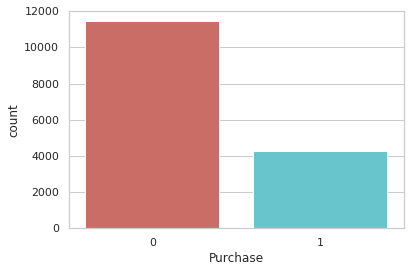

<Figure size 432x288 with 0 Axes>

In [0]:
sns.countplot(x = 'Purchase', data = df, palette = 'hls')
plt.show()
plt.savefig('ccount_plot')

In [0]:
count_no_purcahse = len(df[df['Purchase']== 0])
count_purcahse = len(df) - count_no_purcahse
pct_of_no_purcahse = count_no_purcahse/(count_no_purcahse + count_purcahse)
print("percentage of no purchase is", pct_of_no_purcahse*100)
pct_of_purchase = count_purcahse/(count_no_purcahse + count_purcahse)
print("percentage of purcahse", pct_of_purchase*100)

percentage of no purchase is 72.79552105865886
percentage of purcahse 27.204478941341137


group by predict variable

In [0]:
df.groupby('Purchase').mean()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer
Purchase,,,,
0,0.000000,693272.347077,13.836043,24.378081
1,906.159672,620436.114651,16.343078,31.394995


Observations
1. The average number of purchase amount for clients who purchased drugs during the research period is $ 906.
2. The average Historical Sales Volume from the clients who purchased drugs during the research period is lower than that from the clients who didn't. (but no big difference; class is imbalanced, not enough clients from purchased group.)
3. The average number of prior year transactions DNDi had with the clients who purchased drugs during the research period is higher than that from the clients who didn't.
4. Clients who purchased drugs during the research period has longer years of being customers with DNDi than clients who didn't.

group by categorical variables

In [0]:
df.groupby('External Agent').mean()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer,Purchase
External Agent,,,,,
Assigned,241.405949,668323.189914,14.552857,26.359951,0.268740
Not assigned,249.441972,676397.539332,14.498149,26.245223,0.273937


In [0]:
df.groupby('Repurchase Method').mean()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer,Purchase
Repurchase Method,,,,,
AUTO RENEW,438.726896,879620.998398,14.585885,25.079665,0.306699
NOTICE,176.881637,598768.525585,14.493500,26.724389,0.259490


In [0]:
df.groupby('Last Transaction Channel').mean()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer,Purchase
Last Transaction Channel,,,,,
AUTO RENEW,401.528773,8.494521e+05,14.634830,25.574021,0.298313
BILLING,417.794633,1.149326e+06,16.647059,27.941176,0.411765
BRANCH (PHONE),260.658675,6.407499e+05,14.021898,22.238443,0.301703
BRANCH (POS),152.738375,5.061697e+05,14.774092,23.829384,0.270142
IT,667.324150,9.764568e+05,15.571429,31.000000,0.500000
MAIL,165.704788,5.956824e+05,14.585008,28.014812,0.263009
PHONE,294.103989,7.430263e+05,13.991781,21.468493,0.248402
WEB,296.898178,7.044356e+05,14.397276,25.237609,0.270904


In [0]:
df.groupby('Miltefosine').mean()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer,Purchase
Miltefosine,,,,,
N,222.032521,656183.926225,14.480835,26.440517,0.267315
Y,279.771694,696920.320688,14.568642,26.078470,0.278470


In [0]:
df.groupby("Ambisome").mean()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer,Purchase
Ambisome,,,,,
N,211.572518,641905.776077,14.394518,26.078859,0.261851
Y,292.153785,714665.757462,14.679431,26.558832,0.285358


In [0]:
df.groupby("Pentamidine").mean()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer,Purchase
Pentamidine,,,,,
N,208.528835,654827.432374,14.448977,26.322122,0.261186
Y,306.652504,702950.594157,14.627445,26.231389,0.289236


In [0]:
df.groupby('Ship to country').mean()

,Purchase amount during research period,Historical Sales Volume,Number of Prior Year Transactions,Number of Years Being Customer,Purchase
Ship to country,,,,,
Algeria,683.431492,5.471825e+05,17.111111,20.555556,0.555556
Argentina,38.553718,4.770493e+05,11.923077,26.307692,0.153846
Australia,181.111830,9.529825e+05,14.368421,26.236842,0.184211
Bangladesh,272.455006,7.353500e+05,14.439024,26.182927,0.268293
Cambodia,174.368108,5.604881e+05,12.841584,26.257426,0.188119
Canada,0.000000,2.852116e+05,13.500000,20.250000,0.000000
China,221.394576,6.617534e+05,13.651282,25.820513,0.287179
Egypt,256.291558,6.612711e+05,14.935338,26.481203,0.287218
Ethiopia,279.784185,1.002323e+06,14.878788,27.303030,0.272727


# Visualizations

Text(0, 0.5, 'Frequency of Purchase')

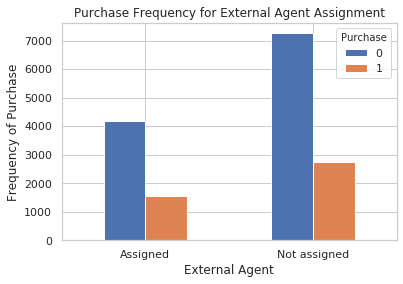

In [0]:
# External Agent
%matplotlib inline
pd.crosstab(df["External Agent"],df["Purchase"]).plot(kind='bar')
plt.title('Purchase Frequency for External Agent Assignment')
plt.xticks(rotation=0)
plt.xlabel('External Agent')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

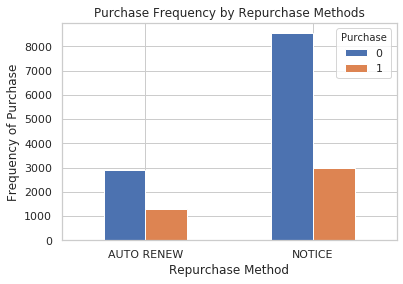

In [0]:
# Repurchase Method
pd.crosstab(df["Repurchase Method"],df["Purchase"]).plot(kind='bar')
plt.title('Purchase Frequency by Repurchase Methods')
plt.xticks(rotation=0)
plt.xlabel('Repurchase Method')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

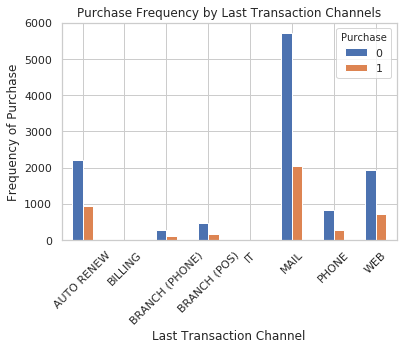

In [0]:
# Last Transaction Channel
pd.crosstab(df["Last Transaction Channel"],df["Purchase"]).plot(kind='bar')
plt.title('Purchase Frequency by Last Transaction Channels')
plt.xticks(rotation=45)
plt.xlabel('Last Transaction Channel')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

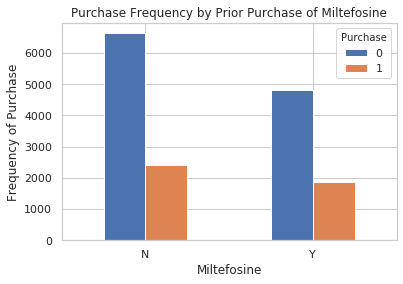

In [0]:
# Miltefosine
pd.crosstab(df["Miltefosine"],df["Purchase"]).plot(kind='bar')
plt.title('Purchase Frequency by Prior Purchase of Miltefosine')
plt.xticks(rotation=0)
plt.xlabel('Miltefosine')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

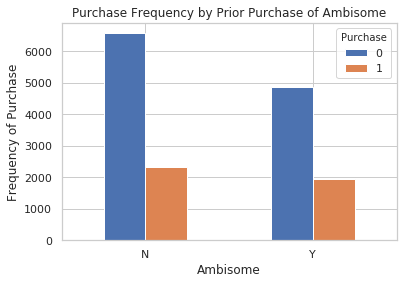

In [0]:
pd.crosstab(df["Ambisome"],df["Purchase"]).plot(kind='bar')
plt.title('Purchase Frequency by Prior Purchase of Ambisome')
plt.xticks(rotation=0)
plt.xlabel('Ambisome')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

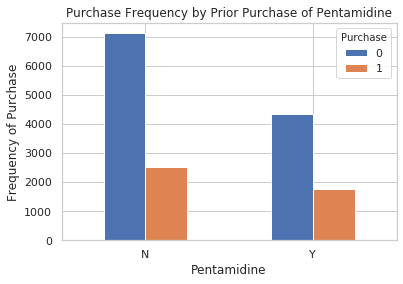

In [0]:
# Pentamidine
pd.crosstab(df["Pentamidine"],df["Purchase"]).plot(kind='bar')
plt.title('Purchase Frequency by Prior Purchase of Pentamidine')
plt.xticks(rotation=0)
plt.xlabel('Pentamidine')
plt.ylabel('Frequency of Purchase')

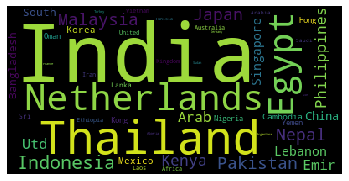

In [0]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(collocations=False).generate(' '.join(df['Ship to country']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

Text(0.5, 0, 'Historical Sales Volume')

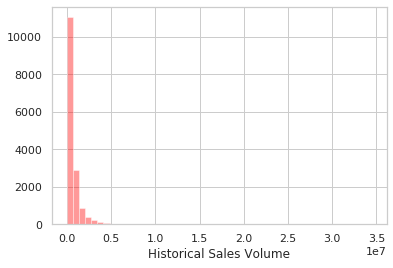

In [0]:
# Historical Sales Volume
sns.distplot(df['Historical Sales Volume'], kde = False, color ='red', bins = 50) 
plt.xlabel('Historical Sales Volume')

Text(0.5, 0, 'Number of Prior Year Transactions')

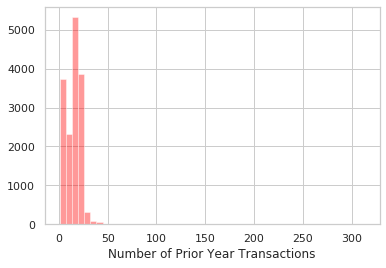

In [0]:
# Number of Prior Year Transactions
sns.distplot(df['Number of Prior Year Transactions'], kde = False, color ='red', bins = 50) 
plt.xlabel('Number of Prior Year Transactions')

Text(0.5, 0, 'Number of Years Being Customer')

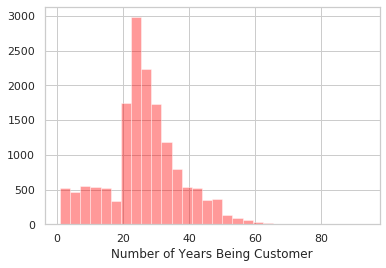

In [0]:
# Number of Years Being Customer
sns.distplot(df['Number of Years Being Customer'], kde = False, color ='red', bins = 30) 
plt.xlabel('Number of Years Being Customer')

In [0]:
# drop purchase amount
df = df.drop(["Purchase amount during research period"], axis = 1)

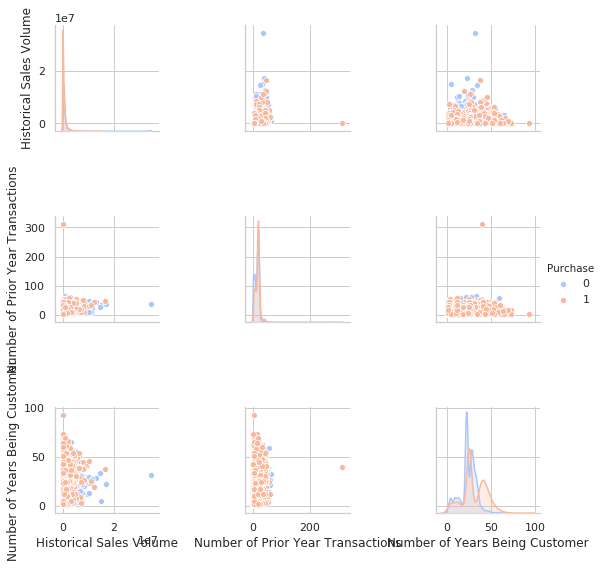

In [0]:
# pairplot
sns.pairplot(df, hue ="Purchase", palette ='coolwarm') 
plt.savefig('1') 

# Create Dummy Variables

In [0]:
cat_vars=["External Agent", 'Repurchase Method', 'Last Transaction Channel', 'Miltefosine', 'Ambisome', 'Pentamidine', 'Ship to country']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [0]:
df_final = df[to_keep]
df_final.columns.values

array(['Historical Sales Volume', 'Number of Prior Year Transactions',
       'Number of Years Being Customer', 'Purchase',
       'External Agent_Assigned', 'External Agent_Not assigned',
       'Repurchase Method_AUTO RENEW', 'Repurchase Method_NOTICE',
       'Last Transaction Channel_AUTO RENEW',
       'Last Transaction Channel_BILLING',
       'Last Transaction Channel_BRANCH (PHONE)',
       'Last Transaction Channel_BRANCH (POS)',
       'Last Transaction Channel_IT', 'Last Transaction Channel_MAIL',
       'Last Transaction Channel_PHONE', 'Last Transaction Channel_WEB',
       'Miltefosine_N', 'Miltefosine_Y', 'Ambisome_N', 'Ambisome_Y',
       'Pentamidine_N', 'Pentamidine_Y', 'Ship to country_Algeria',
       'Ship to country_Argentina', 'Ship to country_Australia',
       'Ship to country_Bangladesh', 'Ship to country_Cambodia',
       'Ship to country_Canada', 'Ship to country_China',
       'Ship to country_Egypt', 'Ship to country_Ethiopia',
       'Ship to country_Fran

In [0]:
# number of explanatory variables
len(df_final.columns.values)-1

66

In [0]:
# separate data by x and y
x = df_final.loc[:, df_final.columns != 'Purchase']
y = df_final.loc[:, df_final.columns == 'Purchase']
# 20% test data
from sklearn.model_selection import train_test_split
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
x_train_orig.columns

Index(['Historical Sales Volume', 'Number of Prior Year Transactions',
       'Number of Years Being Customer', 'External Agent_Assigned',
       'External Agent_Not assigned', 'Repurchase Method_AUTO RENEW',
       'Repurchase Method_NOTICE', 'Last Transaction Channel_AUTO RENEW',
       'Last Transaction Channel_BILLING',
       'Last Transaction Channel_BRANCH (PHONE)',
       'Last Transaction Channel_BRANCH (POS)', 'Last Transaction Channel_IT',
       'Last Transaction Channel_MAIL', 'Last Transaction Channel_PHONE',
       'Last Transaction Channel_WEB', 'Miltefosine_N', 'Miltefosine_Y',
       'Ambisome_N', 'Ambisome_Y', 'Pentamidine_N', 'Pentamidine_Y',
       'Ship to country_Algeria', 'Ship to country_Argentina',
       'Ship to country_Australia', 'Ship to country_Bangladesh',
       'Ship to country_Cambodia', 'Ship to country_Canada',
       'Ship to country_China', 'Ship to country_Egypt',
       'Ship to country_Ethiopia', 'Ship to country_France',
       'Ship to count

In [0]:
columns = x_train_orig.columns

# Oversampling using SMOTE

In [0]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=list(range(3, len(x_train_orig.columns))), random_state=0)
sm_data_x,sm_data_y=smote_nc.fit_sample(x_train_orig, y_train_orig)
sm_data_x = pd.DataFrame(data=sm_data_x, columns=columns)
sm_data_y= pd.DataFrame(data=sm_data_y, columns=['Purchase'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
print("length of oversampled data is ",len(sm_data_x))
print("Number of no purchase in oversampled data",len(sm_data_y[sm_data_y['Purchase']==0]))
print("Number of purchase",len(sm_data_y[sm_data_y['Purchase']==1]))
print("Proportion of no purchase data in oversampled data is ",len(sm_data_y[sm_data_y['Purchase']==0])/len(sm_data_x))
print("Proportion of purchase data in oversampled data is ",len(sm_data_y[sm_data_y['Purchase']==1])/len(sm_data_x))

length of oversampled data is  18274
Number of no purchase in oversampled data 9137
Number of purchase 9137
Proportion of no purchase data in oversampled data is  0.5
Proportion of purchase data in oversampled data is  0.5


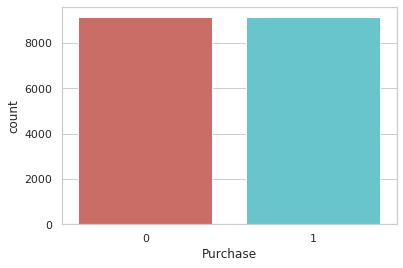

<Figure size 432x288 with 0 Axes>

In [0]:
sns.countplot(x = 'Purchase', data = sm_data_y, palette = 'hls')
plt.show()
plt.savefig('ccount_plot')

# Feature Selection

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,)
rfe = rfe.fit(sm_data_x, sm_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True False  True  True  True  True False False False
  True False False  True  True False False False False  True  True False
  True False  True False  True  True False  True  True False False  True
  True False False False False False False False False False  True False
 False False False  True False False]
[ 1  1  1  1  1  1  1  1 31  1  1 32  1  1  1  1  3  1  1  1  1 28 18 12
  1  4 21  1  1 16 24 20  6  1  1 13  1 22  1 30  1  1  9  1  1  8 10  1
  1 33  2 29 15  5 34  7 27 25  1 19 23 26 17  1 11 14]


In [0]:
sm_data_x = sm_data_x[sm_data_x.columns[rfe.support_]]

In [0]:
sm_x_test = x_test_orig[sm_data_x.columns]

In [0]:
sm_data_x.columns

Index(['Historical Sales Volume', 'Number of Prior Year Transactions',
       'Number of Years Being Customer', 'External Agent_Assigned',
       'External Agent_Not assigned', 'Repurchase Method_AUTO RENEW',
       'Repurchase Method_NOTICE', 'Last Transaction Channel_AUTO RENEW',
       'Last Transaction Channel_BRANCH (PHONE)',
       'Last Transaction Channel_BRANCH (POS)',
       'Last Transaction Channel_MAIL', 'Last Transaction Channel_PHONE',
       'Last Transaction Channel_WEB', 'Miltefosine_N', 'Ambisome_N',
       'Ambisome_Y', 'Pentamidine_N', 'Pentamidine_Y',
       'Ship to country_Bangladesh', 'Ship to country_China',
       'Ship to country_Egypt', 'Ship to country_India',
       'Ship to country_Indonesia', 'Ship to country_Japan',
       'Ship to country_Kenya', 'Ship to country_Lebanon',
       'Ship to country_Malaysia', 'Ship to country_Nepal',
       'Ship to country_Netherlands', 'Ship to country_Pakistan',
       'Ship to country_Philippines', 'Ship to country_

In [0]:
sm_data_x.shape[1]

33

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(sm_data_x, sm_data_y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
sm_y_pred = logreg.predict(sm_x_test)

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(sm_x_test, y_test_orig)))

Accuracy of logistic regression classifier on test set: 0.37


Confusion Matrix

In [0]:
actu = pd.Series(y_test_orig["Purchase"].tolist(), name = "Actual")
pred = pd.Series(sm_y_pred.tolist(), name = "Predicted")
pd.crosstab(actu, pred)

Predicted,0,1
Actual,,
0,446,1859
1,135,704


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test_orig, sm_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.19      0.31      2305
           1       0.27      0.84      0.41       839

    accuracy                           0.37      3144
   macro avg       0.52      0.52      0.36      3144
weighted avg       0.64      0.37      0.34      3144



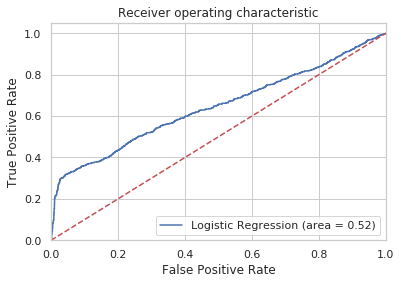

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_orig, logreg.predict(sm_x_test))
fpr, tpr, thresholds = roc_curve(y_test_orig, logreg.predict_proba(sm_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()